In [ ]:
STUDENT DEPRESSION ANALYSIS

This analysis is based on a dataset comprising 27,901 records, providing a comprehensive look into the factors that influence student depression. The dataset includes a wide range of features, such as:

Demographic Details
Gender
Age
City
Profession

Psychological and Lifestyle Factors
Academic Pressure
Work Pressure
Sleep Duration
Dietary Habits
Study Satisfaction
Job Satisfaction
Financial Stress
Additionally, the dataset provides critical information on mental health history, including whether students have ever experienced suicidal thoughts and details about their degree or field of study.

Target Variable
The target variable, Depression, is a binary column indicating whether a student is suffering from depression.

Objective
This analysis aims to uncover patterns and identify potential risk factors associated with student depression. By exploring relationships between lifestyle habits, academic pressures, and mental well-being, this study seeks to provide valuable insights into the factors affecting students' mental health.

This dataset serves as a valuable resource for understanding the challenges faced by students and helps in designing effective interventions for promoting mental well-being.

                                                                                                                                            
                                                                                                                                    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C://studentdepression//student depression.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1


In [5]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [7]:
data.dtypes

id                                         int64
Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [9]:
data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [11]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(data[col].value_counts())

Gender
Male      15547
Female    12354
Name: count, dtype: int64
City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara      

In [13]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [15]:
data = data.dropna(axis=0)
data.isna().sum().sum()

0

In [17]:
data = data.drop(['id','City'],axis=1)

In [19]:
data

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,Male,27,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,Male,31,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,Female,18,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1


In [21]:
data = data[data['Profession'] == 'Student']

In [23]:
data

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,Male,27,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,Male,31,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,Female,18,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1


In [25]:
data = data.drop(['Work Pressure','Profession','Job Satisfaction'],axis=1)
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,3,7.03,5,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27,5,5.75,5,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,Male,27,2,9.40,3,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,Male,31,3,6.61,4,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,Female,18,5,6.88,2,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1


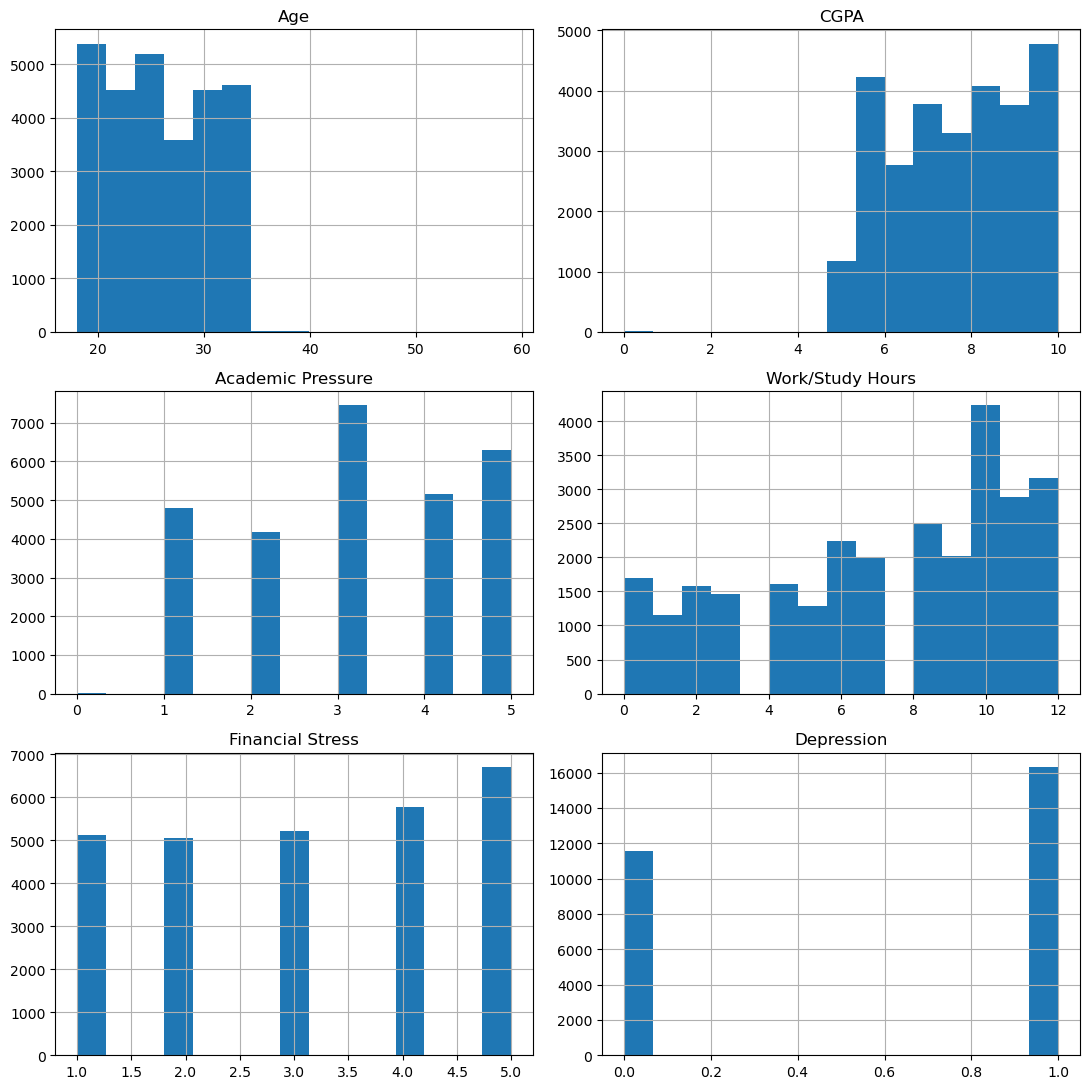

In [27]:
num_cols = ['Age', 'CGPA', 'Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Depression']
num_data = data[num_cols]
num_data.hist(bins=15, figsize=(11,11))
plt.tight_layout()
plt.show()

<Axes: >

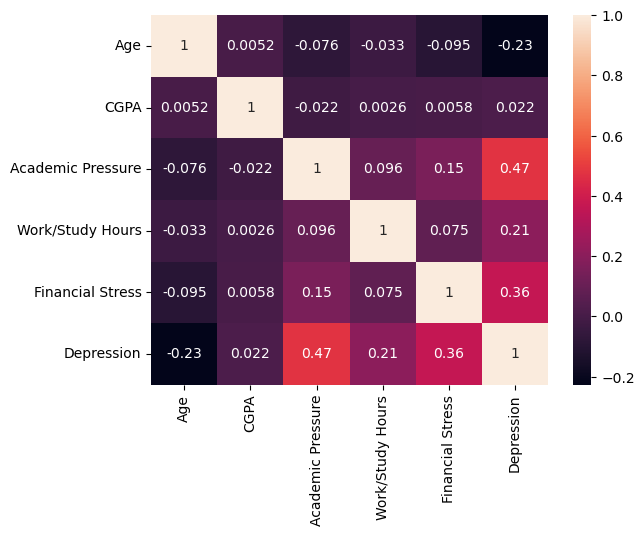

In [29]:
sns.heatmap(num_data.corr(),annot=True)

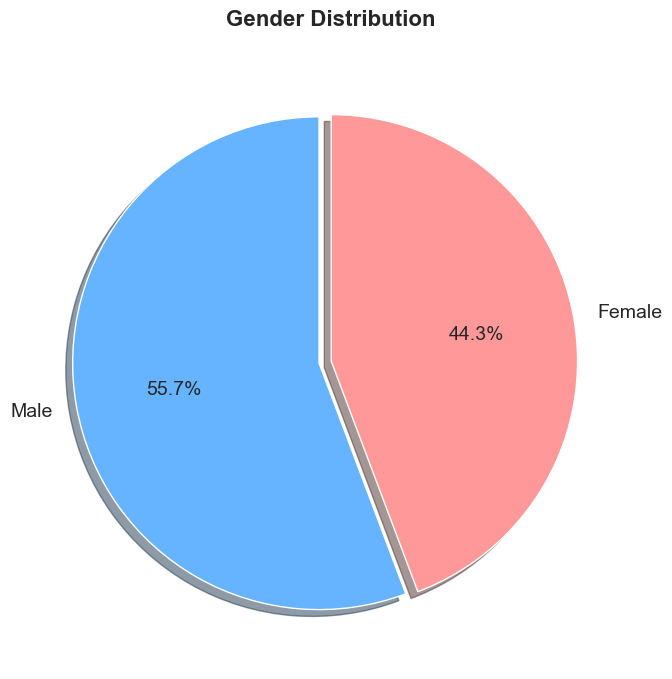

In [31]:
# Set the style for the plots
sns.set(style="whitegrid", palette="pastel")

# Gender Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['#66b3ff', '#ff9999'], shadow=True, explode=(0.05, 0), textprops={'fontsize': 14})
plt.title('Gender Distribution', fontsize=16, fontweight='bold', pad=20)
plt.show()

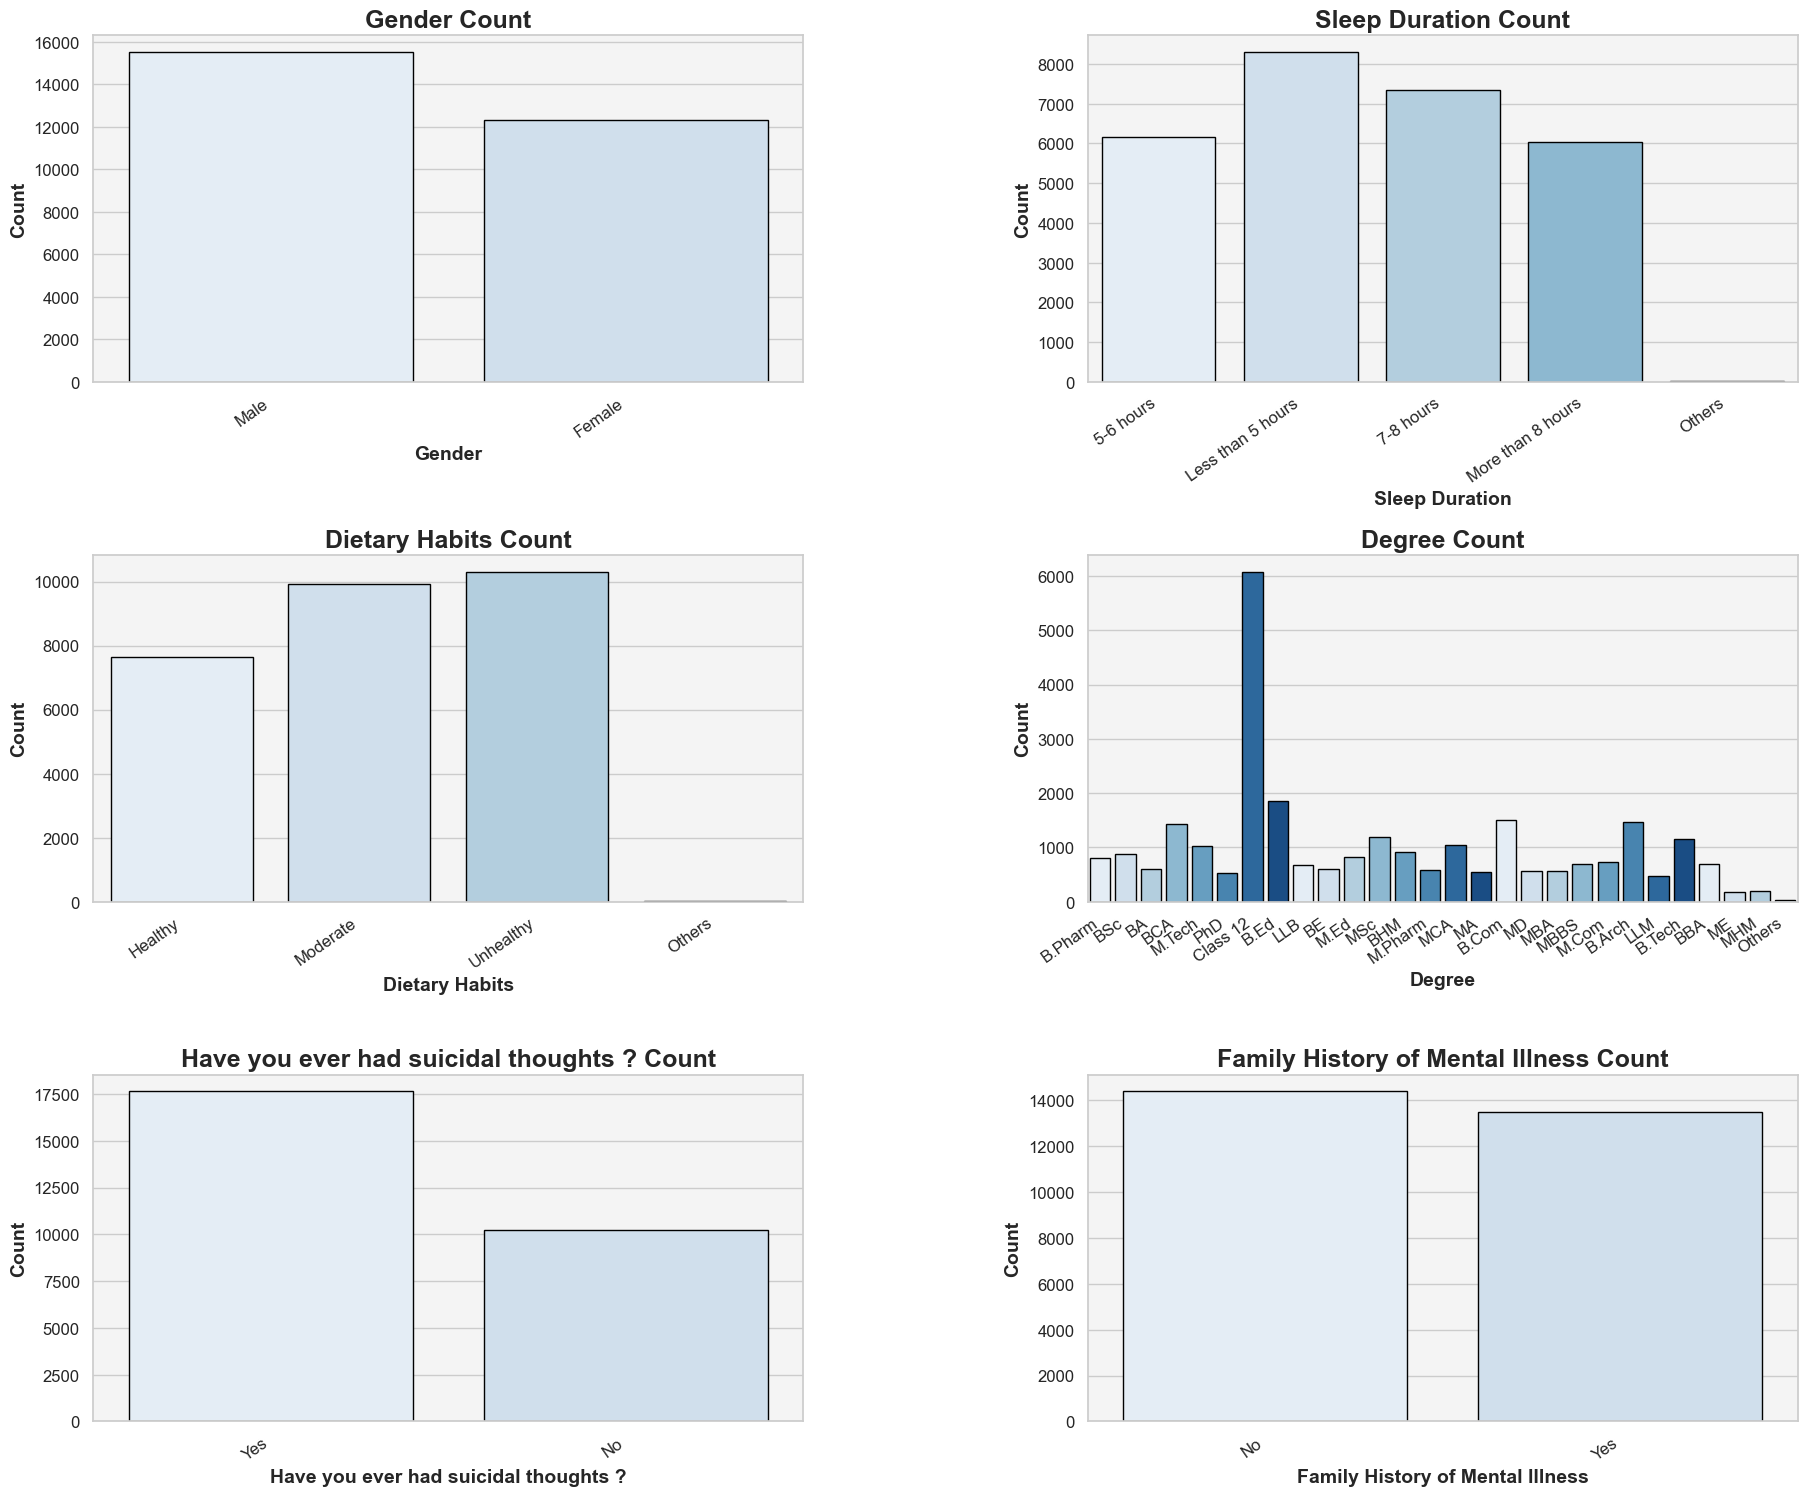

In [33]:
warnings.filterwarnings("ignore")

# Get categorical columns and exclude 'id'
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

# Set a seaborn style for the plot
sns.set(style="whitegrid")

# Determine rows and columns for the subplot grid
num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

# Create figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing
# Use a visually balanced color palette
colors = sns.color_palette("Blues", n_colors=8)

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    # Increase the size of the "City" plot for better readability
    if col.lower() == 'city':
        sns.countplot(data=data, x=col, ax=axes[i], palette=colors, order=data[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=data, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
        # Set labels
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    # Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    # Align x-axis labels horizontally to avoid overlap
    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')

    # Set bar edge color
    for bar in axes[i].patches:
        bar.set_edgecolor('black')

    # Set a soft gray background for subplot
    axes[i].set_facecolor('#f4f4f4')
# Remove unused axes if any
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Show the plot
plt.show()
        

<Axes: ylabel='Depression'>

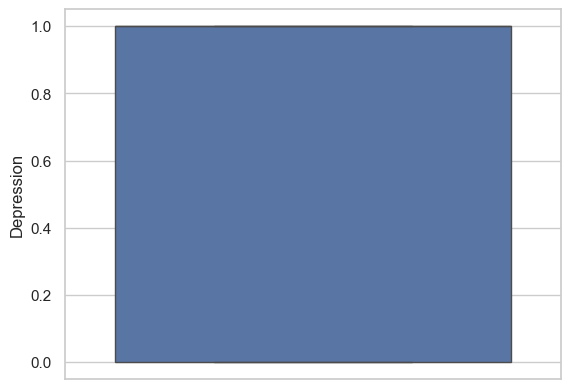

In [37]:
sns.boxplot(data['Depression'])

In [39]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
  
columns = ['Sleep Duration','Dietary Habits','Degree','Family History of Mental Illness','Have you ever had suicidal thoughts ?','Gender']
for cols in columns:
    data[cols]= label_encoder.fit_transform(data[cols]) 
    print(data[cols].unique()) 

[0 2 1 3 4]
[0 1 3 2]
[ 3 10  5  7 17 27 11  2 12  8 15 25  9 16 21 18  1 22 19 20 14  0 13  4
  6 23 24 26]
[0 1]
[1 0]
[1 0]


In [43]:
def preprocess_inputs(df):
    df = df.copy()
        
    y = df['Depression']
    X = df.drop('Depression',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=43)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [45]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
8886,-1.119467,1.664305,-0.830806,0.413302,1.517848,-0.475350,-1.182750,-1.375419,0.760029,0.224332,1.291514,-0.971592
18677,0.893283,0.239895,-0.106885,0.876720,0.049422,0.466562,-0.376025,1.106213,0.760029,1.304916,-0.103214,1.029239
16717,0.893283,-0.167079,-0.830806,1.496881,0.049422,1.408474,-0.376025,-1.513288,-1.315738,-1.936835,-0.800578,1.029239
12772,-1.119467,0.850356,-1.554727,0.890350,0.049422,-1.417262,1.237425,-0.823945,0.760029,-1.936835,-0.800578,-0.971592
5881,0.893283,-1.591489,-0.106885,-0.009225,-0.684791,-1.417262,1.237425,0.003265,0.760029,1.304916,-0.800578,-0.971592
...,...,...,...,...,...,...,...,...,...,...,...,...
26933,0.893283,1.257331,1.340958,1.394657,0.783635,-1.417262,-0.376025,1.106213,0.760029,0.224332,-0.103214,-0.971592
7996,0.893283,-0.981028,-1.554727,1.483251,1.517848,-0.475350,-1.182750,-1.237551,-1.315738,-0.315960,1.291514,-0.971592
18708,-1.119467,-0.167079,0.617037,0.733606,0.783635,0.466562,1.237425,-1.375419,0.760029,0.764624,-0.103214,-0.971592
19798,-1.119467,1.460818,1.340958,-1.467627,-1.419004,0.466562,1.237425,0.554739,0.760029,0.764624,0.594150,-0.971592


In [47]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                    Bagging Classifier": BaggingClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                    Bagging Classifier trained.


In [49]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 84.09%
                   K-Nearest Neighbors: 81.77%
                         Decision Tree: 77.16%
   Support Vector Machine (RBF Kernel): 83.95%
                         Random Forest: 83.61%
                     Gradient Boosting: 84.31%
                    Bagging Classifier: 82.04%


In [51]:
from sklearn.metrics import accuracy_score, classification_report


In [59]:
# Train Gradient Boosting Model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict Output
y_pred = gb_clf.predict(X_test)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print Predicted Output in One Line
print("Predicted Output:", " ".join(map(str, y_pred)))

# Print Actual Output in One Line
print("Actual Output:   ", " ".join(map(str, y_test.values)))
# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8431
Predicted Output: 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0

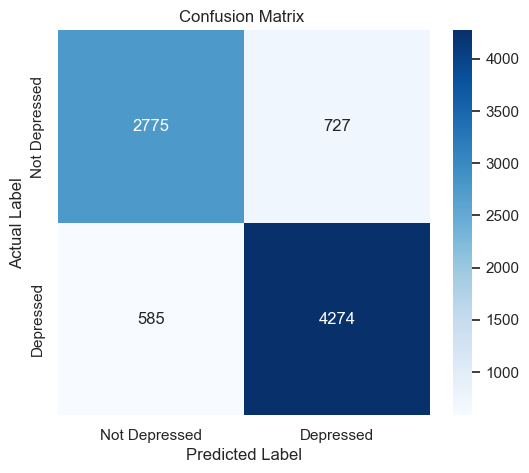

In [ ]:
from sklearn.metrics import confusion_matrix
#Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix ")
plt.show()